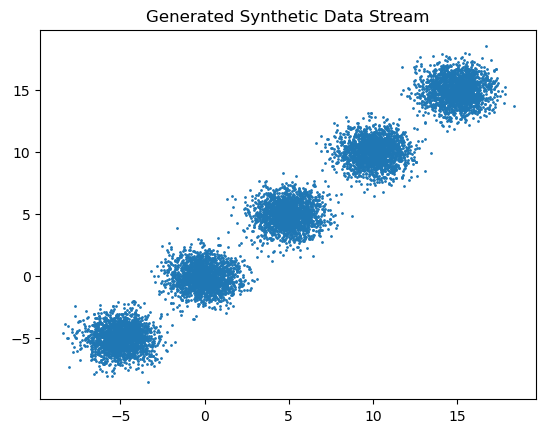

In [2]:
# a
import numpy as np
import matplotlib.pyplot as plt

def generate_data():
    stream_data = np.empty((0, 2))
    n_clusters_per_segment = [3, 5, 2, 4, 6]
    cluster_sizes = [2000] * 5
    centers = [(-5, -5), (0, 0), (5, 5), (10, 10), (15, 15)]
    
    for i, size in enumerate(cluster_sizes):
        # Generate `size` number of elements around `n_clusters_per_segment[i]` centers
        data = np.vstack([
            np.random.randn(size // n_clusters_per_segment[i], 2) + centers[i % len(centers)]
            for _ in range(n_clusters_per_segment[i])
        ])
        stream_data = np.vstack([stream_data, data])
    
    return stream_data

stream_data = generate_data()

plt.scatter(stream_data[:, 0], stream_data[:, 1], s=1)
plt.title("Generated Synthetic Data Stream")
plt.show()


c:\Users\ritz\anaconda3\envs\BDA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ritz\anaconda3\envs\BDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


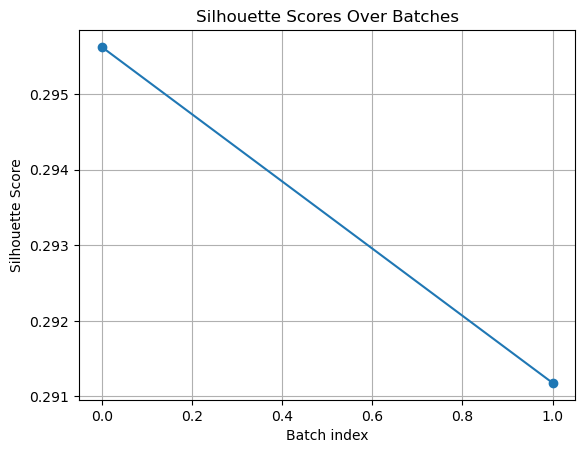

In [3]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
import numpy as np

def evaluate_stream_clustering(data, batch_size=1000, n_clusters=5):
    model = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
    scores = []
    
    for i in range(0, len(data), batch_size):
        batch = data[i:i + batch_size]
        model.partial_fit(batch)
        
        if len(batch) == batch_size:
            # Predict the cluster labels for the batch
            labels = model.predict(batch)
            # Check if there are at least two distinct clusters before computing silhouette score
            if len(np.unique(labels)) > 1:
                score = silhouette_score(batch, labels)
                scores.append(score)
            else:
                # Append NaN or a specific indicator when silhouette score cannot be computed
                scores.append(np.nan)
    
    return scores

# Generate the synthetic data again (if necessary)
# stream_data = generate_data()

# Evaluate the clustering and plot the silhouette scores
silhouette_scores = evaluate_stream_clustering(stream_data)
plt.plot(silhouette_scores, marker='o')
plt.title("Silhouette Scores Over Batches")
plt.xlabel("Batch index")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


c:\Users\ritz\anaconda3\envs\BDA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ritz\anaconda3\envs\BDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


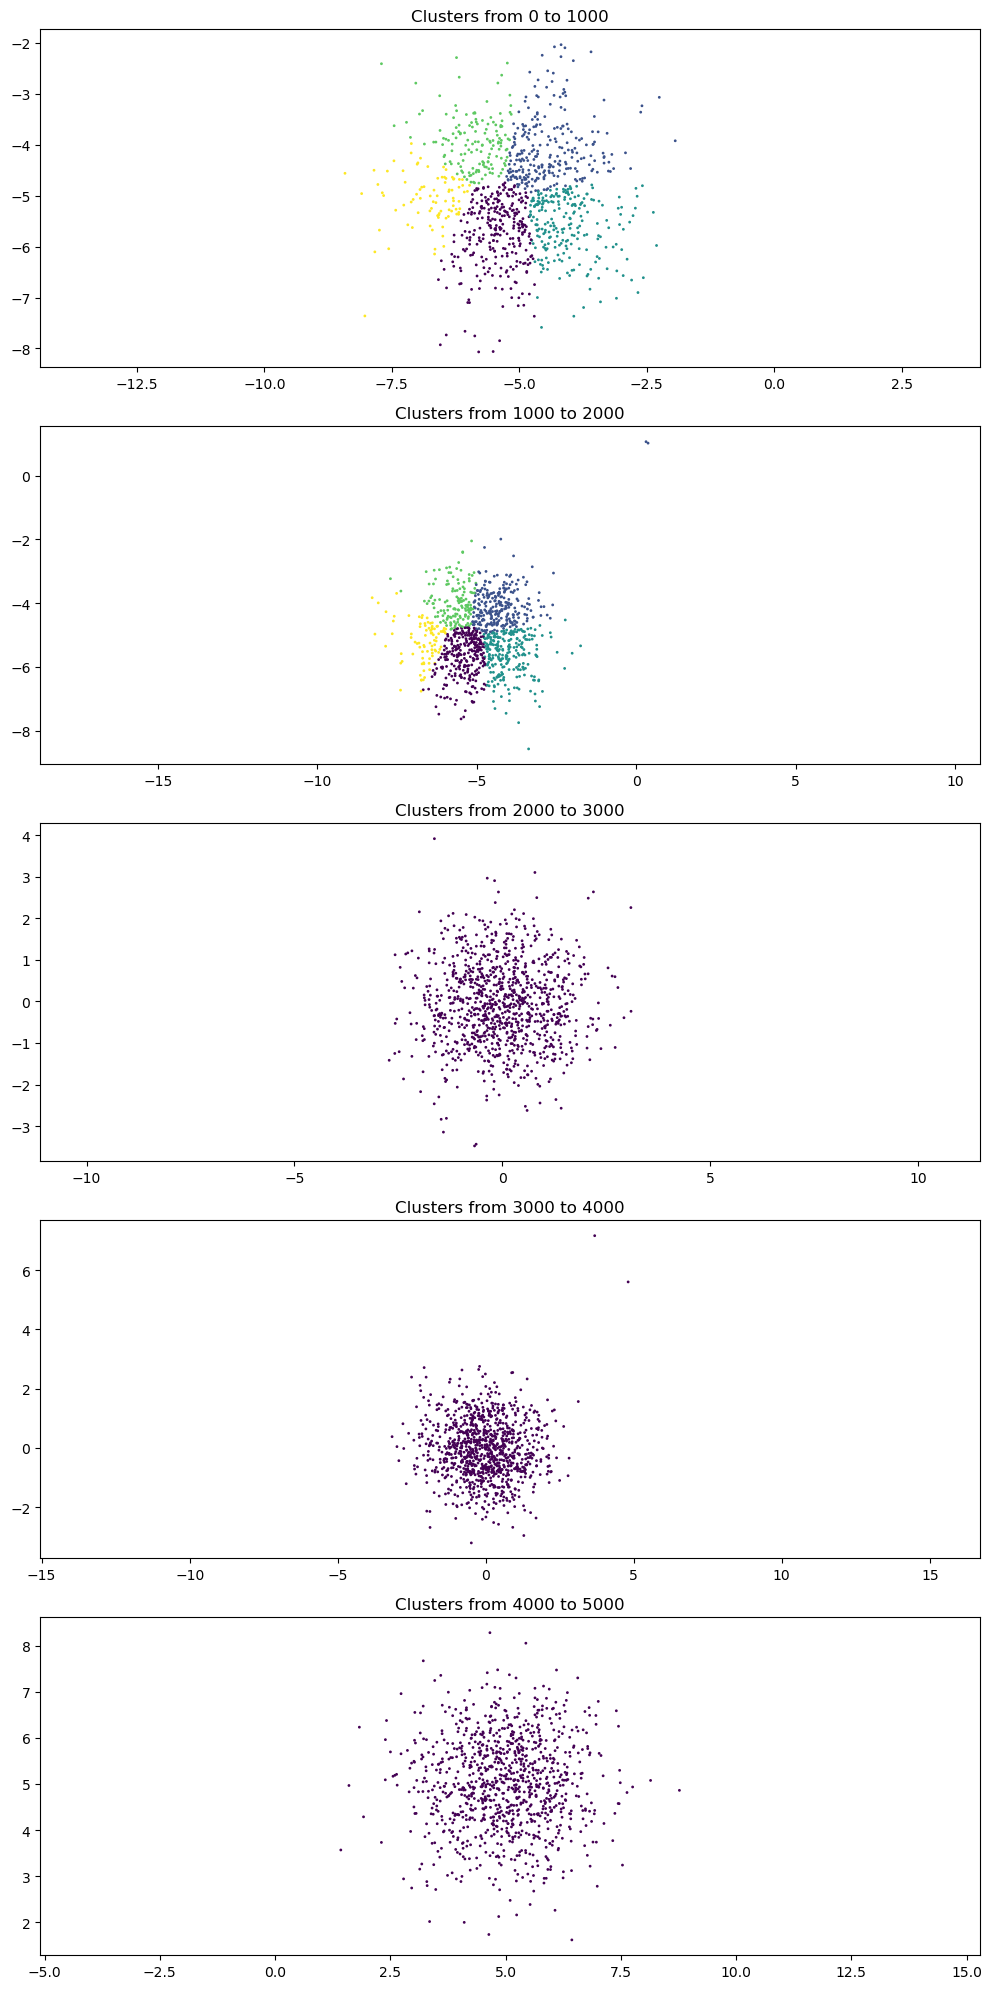

In [4]:
# c
def plot_clusters_over_time(data, batch_size=1000, n_clusters=5):
    model = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
    _, axs = plt.subplots(5, 1, figsize=(10, 20))
    
    for i, ax in enumerate(axs.flatten()):
        start = i * batch_size
        end = start + batch_size
        batch = data[start:end]
        model.partial_fit(batch)
        preds = model.predict(batch)
        
        ax.scatter(batch[:, 0], batch[:, 1], c=preds, s=1)
        ax.set_title(f"Clusters from {start} to {end}")
        ax.axis('equal')
    
    plt.tight_layout()
    plt.show()

plot_clusters_over_time(stream_data)
